In [1]:
import numpy as np
import pandas as pd 
from numpy import log, exp
from itertools import product 
import matplotlib.pyplot as plt 
from scipy.stats import lognorm
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_percentage_error as mape
from skforecast.metrics import symmetric_mean_absolute_percentage_error as smape

Compute the RMSE and Symmetric Mean Absolute Percentage Error (sMAPE) of the predictions:

For actual values \( y_t \) and predictions \( \hat{y}_t \):

$$\text{sMAPE} = \frac{100\%}{n} \sum_{t=1}^n \frac{|y_t - \hat{y}_t|}{\frac{|y_t| + |\hat{y}_t|}{2}}$$

Parametros estimados pela CDF:

In [2]:
df_cdf = pd.read_csv('results/preds_CDF_death_weights_equal_v3.csv')

#df_cdf.loc[df_cdf.mu.isna(), ['mu', 'sigma']] = [0.01, 1/2]

In [3]:
df_cdf.isnull().sum()

model              0
forecast_date      0
target_end_date    0
horizon            0
lower_95           0
upper_95           0
lower_50           0
upper_50           0
lower_98           0
lower_90           0
lower_80           0
lower_70           0
lower_60           0
lower_40           0
lower_30           0
lower_20           0
lower_10           0
pred               0
upper_10           0
upper_20           0
upper_30           0
upper_40           0
upper_60           0
upper_70           0
upper_80           0
upper_90           0
upper_98           0
value              0
mu                 4
sigma              0
dtype: int64

Parâmetros estimados pela KL:

In [4]:
df_kl = pd.read_csv('results/preds_KL_2_death.csv')

#df_kl.loc[df_kl.mu.isna(), ['mu', 'sigma']] = [0.01, 1/2]
df_kl.head()

,model,forecast_date,target_end_date,horizon,lower_95,upper_95,lower_50,upper_50,lower_98,lower_90,...,upper_30,upper_40,upper_60,upper_70,upper_80,upper_90,upper_98,value,mu,sigma
0,AIpert-pwllnod,2021-07-19,2021-07-31,1,595.955733,4341.901891,1521.826927,2810.933415,428.091306,822.916022,...,2466.539847,2632.180792,3009.982937,3241.999466,3533.929238,3966.613137,4778.256172,2571.0,7.370375,0.452684
1,AIpert-pwllnod,2021-07-19,2021-08-07,2,482.710172,5682.092035,1566.049852,3355.332615,342.360199,748.270963,...,2831.924726,3083.665134,3657.847238,4010.464978,4454.138612,5111.729773,6345.261427,3668.0,7.406262,0.550544
2,AIpert-pwllnod,2021-07-19,2021-08-14,3,404.932573,7807.806832,1660.787331,4208.366189,281.569183,712.782261,...,3398.666823,3788.103155,4676.349006,5221.840136,5908.192535,6925.470183,8833.713869,4661.0,7.477282,0.652295
3,AIpert-pwllnod,2021-07-19,2021-08-21,4,352.113552,11195.813238,1810.056893,5541.739899,230.007093,709.501538,...,4269.847943,4881.582321,6276.856667,7133.725041,8211.861115,9809.821186,12807.328527,7304.0,7.583561,0.760635
4,AIpert-pwllnod,2021-07-26,2021-08-07,1,649.222301,3820.828929,1459.009347,2550.466220,466.013035,847.726697,...,2264.696295,2402.141372,2715.632972,2908.154993,3150.391657,3509.422884,4182.905755,3668.0,7.327829,0.409190


In [5]:
df_kl.columns

Index(['model', 'forecast_date', 'target_end_date', 'horizon', 'lower_95',
       'upper_95', 'lower_50', 'upper_50', 'lower_98', 'lower_90', 'lower_80',
       'lower_70', 'lower_60', 'lower_40', 'lower_30', 'lower_20', 'lower_10',
       'pred', 'upper_10', 'upper_20', 'upper_30', 'upper_40', 'upper_60',
       'upper_70', 'upper_80', 'upper_90', 'upper_98', 'value', 'mu', 'sigma'],
      dtype='object')

In [6]:
df_aprox = df_cdf.merge(df_kl, left_on = ['model', 'forecast_date', 'target_end_date', 'horizon', 'lower_95',
                                          'upper_95', 'lower_50', 'upper_50', 'lower_98', 'lower_90', 'lower_80',
                                          'lower_70', 'lower_60', 'lower_40', 'lower_30', 'lower_20', 'lower_10',
                                          'pred', 'upper_10', 'upper_20', 'upper_30', 'upper_40', 'upper_60',
                                          'upper_70', 'upper_80', 'upper_90', 'upper_98', 'value'],
                        right_on =['model', 'forecast_date', 'target_end_date', 'horizon', 'lower_95',
                                   'upper_95', 'lower_50', 'upper_50', 'lower_98', 'lower_90', 'lower_80',
                                   'lower_70', 'lower_60', 'lower_40', 'lower_30', 'lower_20', 'lower_10',
                                   'pred', 'upper_10', 'upper_20', 'upper_30', 'upper_40', 'upper_60',
                                   'upper_70', 'upper_80', 'upper_90', 'upper_98', 'value'],suffixes=('_cdf', '_kl'))

df_aprox.target_end_date = pd.to_datetime(df_aprox.target_end_date)

df_aprox = df_aprox.loc[df_aprox.value > 1]
df_aprox.head()

,model,forecast_date,target_end_date,horizon,lower_95,upper_95,lower_50,upper_50,lower_98,lower_90,...,upper_60,upper_70,upper_80,upper_90,upper_98,value,mu_cdf,sigma_cdf,mu_kl,sigma_kl
0,AIpert-pwllnod,2021-07-19,2021-07-31,1,595.955733,4341.901891,1521.826927,2810.933415,428.091306,822.916022,...,3009.982937,3241.999466,3533.929238,3966.613137,4778.256172,2571.0,7.627476,0.454140,7.370375,0.452684
1,AIpert-pwllnod,2021-07-19,2021-08-07,2,482.710172,5682.092035,1566.049852,3355.332615,342.360199,748.270963,...,3657.847238,4010.464978,4454.138612,5111.729773,6345.261427,3668.0,7.718169,0.558158,7.406262,0.550544
2,AIpert-pwllnod,2021-07-19,2021-08-14,3,404.932573,7807.806832,1660.787331,4208.366189,281.569183,712.782261,...,4676.349006,5221.840136,5908.192535,6925.470183,8833.713869,4661.0,7.843916,0.679365,7.477282,0.652295
3,AIpert-pwllnod,2021-07-19,2021-08-21,4,352.113552,11195.813238,1810.056893,5541.739899,230.007093,709.501538,...,6276.856667,7133.725041,8211.861115,9809.821186,12807.328527,7304.0,8.010528,0.800023,7.583561,0.760635
4,AIpert-pwllnod,2021-07-26,2021-08-07,1,649.222301,3820.828929,1459.009347,2550.466220,466.013035,847.726697,...,2715.632972,2908.154993,3150.391657,3509.422884,4182.905755,3668.0,7.558697,0.413585,7.327829,0.409190


In [7]:
df_aprox.isnull().sum()

model              0
forecast_date      0
target_end_date    0
horizon            0
lower_95           0
upper_95           0
lower_50           0
upper_50           0
lower_98           0
lower_90           0
lower_80           0
lower_70           0
lower_60           0
lower_40           0
lower_30           0
lower_20           0
lower_10           0
pred               0
upper_10           0
upper_20           0
upper_30           0
upper_40           0
upper_60           0
upper_70           0
upper_80           0
upper_90           0
upper_98           0
value              0
mu_cdf             4
sigma_cdf          0
mu_kl              0
sigma_kl           0
dtype: int64

In [8]:
df_aprox = df_aprox.dropna()
df_aprox = df_aprox.reset_index(drop = True)

Mediana e percentil de 95% estimado por cada uma das aproximações: 

In [9]:
for lb in ['cdf', 'kl']: 
    df_aprox[f'med_{lb}'] = lognorm.ppf(0.5, scale=np.exp(df_aprox[f'mu_{lb}'].values), s=df_aprox[f'sigma_{lb}'].values)
    df_aprox[f'upper_95_{lb}'] = lognorm.ppf(0.975, scale=np.exp(df_aprox[f'mu_{lb}'].values), s=df_aprox[f'sigma_{lb}'].values)

df_aprox.head()

,model,forecast_date,target_end_date,horizon,lower_95,upper_95,lower_50,upper_50,lower_98,lower_90,...,upper_98,value,mu_cdf,sigma_cdf,mu_kl,sigma_kl,med_cdf,upper_95_cdf,med_kl,upper_95_kl
0,AIpert-pwllnod,2021-07-19,2021-07-31,1,595.955733,4341.901891,1521.826927,2810.933415,428.091306,822.916022,...,4778.256172,2571.0,7.627476,0.454140,7.370375,0.452684,2053.859153,5001.901731,1588.229838,3856.901548
1,AIpert-pwllnod,2021-07-19,2021-08-07,2,482.710172,5682.092035,1566.049852,3355.332615,342.360199,748.270963,...,6345.261427,3668.0,7.718169,0.558158,7.406262,0.550544,2248.838508,6715.262346,1646.260354,4843.090015
2,AIpert-pwllnod,2021-07-19,2021-08-14,3,404.932573,7807.806832,1660.787331,4208.366189,281.569183,712.782261,...,8833.713869,4661.0,7.843916,0.679365,7.477282,0.652295,2550.170735,9657.076677,1767.430858,6347.127899
3,AIpert-pwllnod,2021-07-19,2021-08-21,4,352.113552,11195.813238,1810.056893,5541.739899,230.007093,709.501538,...,12807.328527,7304.0,8.010528,0.800023,7.583561,0.760635,3012.506598,14451.367725,1965.616032,8728.755683
4,AIpert-pwllnod,2021-07-26,2021-08-07,1,649.222301,3820.828929,1459.009347,2550.466220,466.013035,847.726697,...,4182.905755,3668.0,7.558697,0.413585,7.327829,0.409190,1917.346173,4312.658938,1522.073295,3394.207212


In [10]:
df_aprox.isnull().sum()

model              0
forecast_date      0
target_end_date    0
horizon            0
lower_95           0
upper_95           0
lower_50           0
upper_50           0
lower_98           0
lower_90           0
lower_80           0
lower_70           0
lower_60           0
lower_40           0
lower_30           0
lower_20           0
lower_10           0
pred               0
upper_10           0
upper_20           0
upper_30           0
upper_40           0
upper_60           0
upper_70           0
upper_80           0
upper_90           0
upper_98           0
value              0
mu_cdf             0
sigma_cdf          0
mu_kl              0
sigma_kl           0
med_cdf            0
upper_95_cdf       0
med_kl             0
upper_95_kl        0
dtype: int64

In [11]:
df_aprox[df_aprox.isnull().any(axis=1)]

,model,forecast_date,target_end_date,horizon,lower_95,upper_95,lower_50,upper_50,lower_98,lower_90,...,upper_98,value,mu_cdf,sigma_cdf,mu_kl,sigma_kl,med_cdf,upper_95_cdf,med_kl,upper_95_kl


In [12]:
df_aprox[df_aprox.isnull().any(axis=1)]

,model,forecast_date,target_end_date,horizon,lower_95,upper_95,lower_50,upper_50,lower_98,lower_90,...,upper_98,value,mu_cdf,sigma_cdf,mu_kl,sigma_kl,med_cdf,upper_95_cdf,med_kl,upper_95_kl


Erro RMSE entre as medias e percentil superior de 95% estimados por cada uma das aproximações: 

In [13]:
df_erros = pd.DataFrame()

for model, state, val_test in product(df_aprox['model'].unique(), df_aprox['target_end_date'].unique(), df_aprox['horizon'].unique()):

    try: 
        df_model = df_aprox.loc[(df_aprox.model == model) & (df_aprox.target_end_date == state) & (df_aprox.horizon == val_test)]
    
        df_erros = pd.concat([df_erros,
                             pd.DataFrame([[state, model, val_test, 
                                            rmse(df_model.pred, df_model.med_cdf), 
                                            rmse(df_model.upper_95, df_model.upper_95_cdf),
                                            rmse(df_model.pred, df_model.med_kl), 
                                            rmse(df_model.upper_95, df_model.upper_95_kl),
                                            smape(df_model.pred, df_model.med_cdf), 
                                            smape(df_model.upper_95, df_model.upper_95_cdf),
                                            smape(df_model.pred, df_model.med_kl), 
                                            smape(df_model.upper_95, df_model.upper_95_kl)]],
                                         columns = ['target_end_date', 'model', 'horizon', 'rmse_pred_cdf', 'rmse_upper_cdf',
                                                    'rmse_pred_kl', 'rmse_upper_kl', 'mape_pred_cdf', 'mape_upper_cdf',
                                                    'mape_pred_kl', 'mape_upper_kl'])],
                            ignore_index = True)
    except: 
        pass 

df_erros.head()

,target_end_date,model,horizon,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl,mape_pred_cdf,mape_upper_cdf,mape_pred_kl,mape_upper_kl
0,2021-07-31,AIpert-pwllnod,1,46.226588,659.999839,419.402727,485.000343,2.276335,14.127006,23.326962,11.831003
1,2021-08-07,AIpert-pwllnod,1,33.440670,491.830008,361.832208,426.621718,1.759456,12.093951,21.246886,11.825907
2,2021-08-07,AIpert-pwllnod,2,114.359130,1033.170310,488.219024,839.002020,5.217925,16.667593,25.826640,15.942756
3,2021-08-14,AIpert-pwllnod,1,25.601845,473.840461,377.485953,390.828152,1.291246,11.518513,21.193020,10.616306
4,2021-08-14,AIpert-pwllnod,2,72.126411,763.623982,432.478774,595.193630,3.575504,15.044802,24.503951,13.538642


Summary comparing the methodologys: 

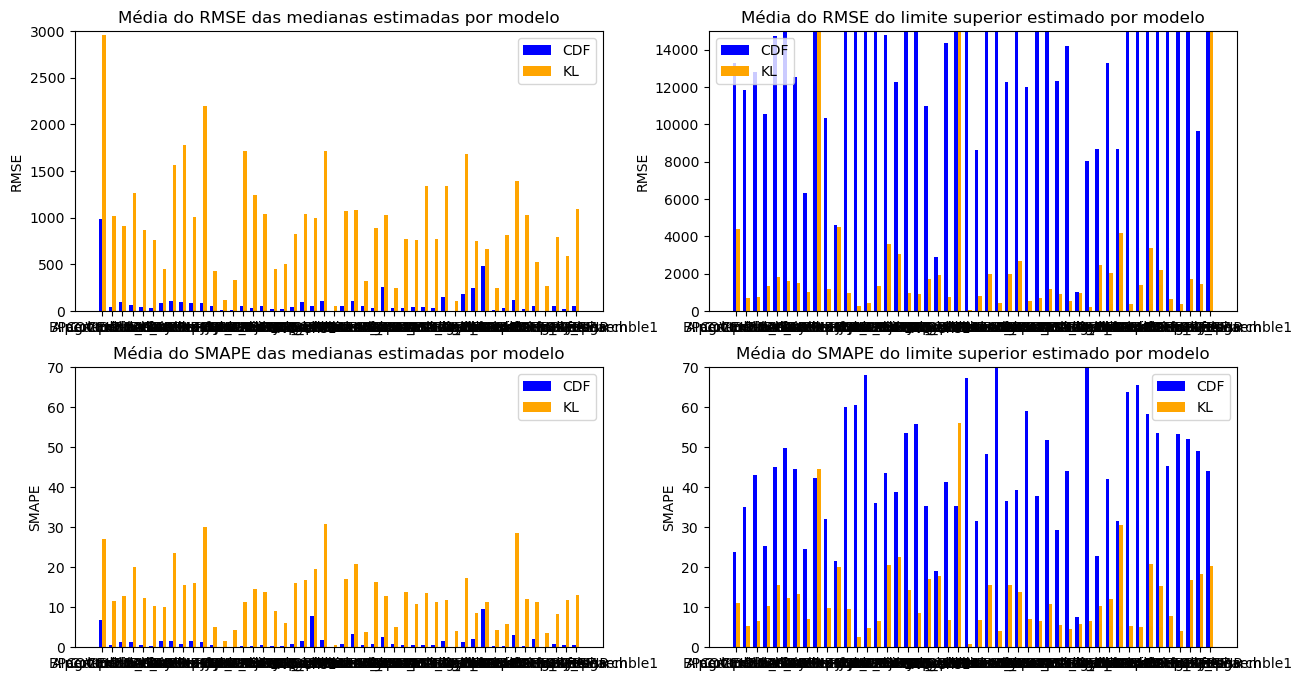

In [20]:
_, ax = plt.subplots(2, 2, figsize=(15, 8))

# Group data
pred_cdf = df_erros.groupby('model')[['rmse_pred_cdf']].mean()
upper_cdf = df_erros.groupby('model')[['rmse_upper_cdf']].mean()

pred_kl = df_erros.groupby('model')[['rmse_pred_kl']].mean()
upper_kl = df_erros.groupby('model')[['rmse_upper_kl']].mean()

pred_cdf_mape = df_erros.groupby('model')[['mape_pred_cdf']].mean()
upper_cdf_mape = df_erros.groupby('model')[['mape_upper_cdf']].mean()

pred_kl_mape = df_erros.groupby('model')[['mape_pred_kl']].mean()
upper_kl_mape = df_erros.groupby('model')[['mape_upper_kl']].mean()


x = np.arange(len(pred_cdf))  # positions for bars
width = 0.35  # width of the bars

# First subplot: side-by-side bars
ax[0,0].bar(x - width/2, pred_cdf.rmse_pred_cdf.values, width, label='CDF', color='blue')
ax[0,0].bar(x + width/2, pred_kl.rmse_pred_kl.values, width, label='KL', color='orange')
ax[0,0].set_xticks(x)
ax[0,0].set_xticklabels(pred_cdf.index.astype(str))
ax[0,0].legend()

ax[0,0].set_title('Média do RMSE das medianas estimadas por modelo')
ax[0,1].set_title('Média do RMSE do limite superior estimado por modelo')
ax[0,0].set_ylabel('RMSE')
#ax[0,0].set_xlabel('Modelo') 
ax[0,1].set_ylabel('RMSE') 

# Second subplot: side-by-side bars
ax[0,1].bar(x - width/2, upper_cdf.rmse_upper_cdf.values, width, label='CDF', color='blue')
ax[0,1].bar(x + width/2, upper_kl.rmse_upper_kl.values, width, label='KL', color='orange')
ax[0,1].set_xticks(x)
ax[0,1].set_xticklabels(upper_cdf.index.astype(str))
ax[0,1].legend()
ax[0,0].set_ylim([0, 3000])
ax[0,1].set_ylim([0, 15000])


ax[1,0].bar(x - width/2, pred_cdf_mape.mape_pred_cdf.values, width, label='CDF', color='blue')
ax[1,0].bar(x + width/2, pred_kl_mape.mape_pred_kl.values, width, label='KL', color='orange')
ax[1,0].set_xticks(x)
ax[1,0].set_xticklabels(pred_cdf.index.astype(str))
ax[1,0].legend()

ax[1,0].set_title('Média do SMAPE das medianas estimadas por modelo')
ax[1,1].set_title('Média do SMAPE do limite superior estimado por modelo')
ax[1,0].set_ylabel('SMAPE')
#ax[0,0].set_xlabel('Modelo') 
ax[1,1].set_ylabel('SMAPE') 

# Second subplot: side-by-side bars
ax[1,1].bar(x - width/2, upper_cdf_mape.mape_upper_cdf.values, width, label='CDF', color='blue')
ax[1,1].bar(x + width/2, upper_kl_mape.mape_upper_kl.values, width, label='KL', color='orange')
ax[1,1].set_xticks(x)
ax[1,1].set_xticklabels(upper_cdf.index.astype(str))
ax[1,1].legend()
ax[1,0].set_ylim([0, 70])
ax[1,1].set_ylim([0, 70])
plt.savefig('mean_erro.png', dpi = 400, bbox_inches = 'tight')
plt.show()

Visualização de algum modelo em detalhe: 

In [15]:
df_erros.loc[df_erros.rmse_pred_cdf == df_erros.rmse_pred_cdf.max()]

,target_end_date,model,horizon,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl,mape_pred_cdf,mape_upper_cdf,mape_pred_kl,mape_upper_kl
111,2022-03-12,AIpert-pwllnod,4,12081.02417,141914.771473,2712.156919,79255.725444,43.262545,50.914564,13.211786,47.135081


In [16]:
df_erros.loc[df_erros.mape_pred_cdf == df_erros.mape_pred_cdf.max()]

,target_end_date,model,horizon,rmse_pred_cdf,rmse_upper_cdf,rmse_pred_kl,rmse_upper_kl,mape_pred_cdf,mape_upper_cdf,mape_pred_kl,mape_upper_kl
5209,2022-01-22,MIT-Cassandra,1,258.059009,5621.667022,122.200880,1290.304984,200.0,94.323778,200.0,34.006520
5214,2022-01-29,MIT-Cassandra,2,262.241965,5712.777656,122.975502,1289.233315,200.0,94.323699,200.0,33.531918
5219,2022-02-05,MIT-Cassandra,3,266.284970,5800.841181,124.072068,1335.230626,200.0,94.323615,200.0,34.086963
5224,2022-02-12,MIT-Cassandra,4,270.272859,5887.734595,125.559034,1393.983932,200.0,94.323734,200.0,34.891690
5252,2022-04-09,MIT-Cassandra,3,759.197656,16538.683711,299.242360,5611.639032,200.0,94.323784,200.0,46.490811
5254,2022-04-16,MIT-Cassandra,4,781.475433,17023.985918,308.835072,6185.341383,200.0,94.323745,200.0,48.976741
9761,2022-04-09,UMich-RidgeTfReg,4,0.072869,6757.096079,0.180695,2677.427744,200.0,111.564033,200.0,199.892225
